In [16]:
#Running only on columns with a correlation of .5 or higher from the Lauren_Cluster worksheet
#'GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','HDI', 'Schooling'

In [17]:
#working from this walk through
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177816-understand-how-k-means-clustering-works

In [3]:
#Starting here:
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177851-carry-out-a-k-means-clustering

In [4]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

#import the kmeans algorithm
from sklearn.cluster import KMeans

#import functions from the tutorial
from functions import *

In [5]:
#load the cleaned & scaled data
happy_df = pd.read_csv("Resources/Data/scaled_data.csv", index_col="country_id")
happy_df = happy_df.drop(columns=['Unnamed: 0'])
happy_data = happy_df[['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','HDI', 'Schooling']]
happy_data.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Beer_Servings,Wine_Servings,HDI,Schooling
country_id,,,,,,,,
0.000000,0.929138,0.979132,0.936153,0.973512,0.699468,0.262162,0.941983,0.833333
0.006494,0.940905,0.980836,0.942685,0.975842,0.595745,0.751351,0.973629,0.941176
0.012987,0.958889,0.967350,0.964818,0.944962,0.492021,0.756757,0.989451,0.784314
0.019481,0.940779,1.000000,0.950464,0.973224,0.619681,0.210811,0.969409,0.931373
0.025974,0.968310,0.977240,0.953078,0.980259,0.449468,0.348649,1.000000,0.867647


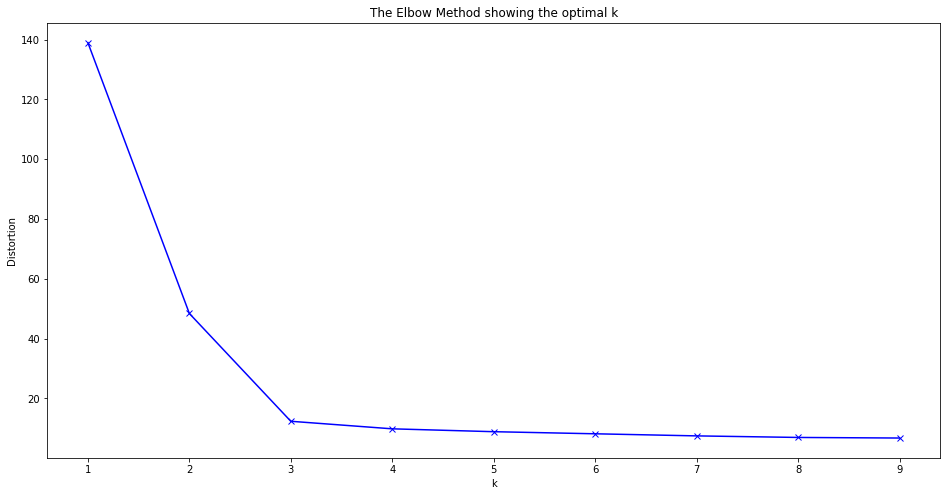

In [15]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(happy_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
#Skipped the steps scaling & cleaning the data as we already performed this
#Using 3 clusters based on the elbow method done in previous cell

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(happy_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(happy_data)

In [7]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(happy_data, columns=happy_data.columns, index = happy_data.index)
happy_clustered['cluster'] = clusters

happy_clustered.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Beer_Servings,Wine_Servings,HDI,Schooling,cluster
country_id,,,,,,,,,
0.000000,0.929138,0.979132,0.936153,0.973512,0.699468,0.262162,0.941983,0.833333,1
0.006494,0.940905,0.980836,0.942685,0.975842,0.595745,0.751351,0.973629,0.941176,1
0.012987,0.958889,0.967350,0.964818,0.944962,0.492021,0.756757,0.989451,0.784314,1
0.019481,0.940779,1.000000,0.950464,0.973224,0.619681,0.210811,0.969409,0.931373,1
0.025974,0.968310,0.977240,0.953078,0.980259,0.449468,0.348649,1.000000,0.867647,1


In [8]:
# Moving to next step of the tutorial, "Analyze the Results of a K-means Clustering"
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [9]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(happy_data)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(happy_data)

In [10]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = happy_data.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

,PC1,PC2,cluster
country_id,,,
0.000000,-0.002756,0.536598,1
0.006494,-0.021833,0.757977,1
0.012987,-0.006101,0.653958,1
0.019481,-0.012699,0.499788,1
0.025974,-0.006117,0.448937,1


In [18]:
#centers giving problems atm so just striking them from the code for now
# centres_reduced = pca.transform(kmeans.cluster_centers_)

In [19]:
# display_factorial_planes(happy_data, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
# plt.scatter(centres_reduced[:,0], centres_reduced[:,1],
#            marker='x', s=169, linewidth=3,
#            color='r', zorder=10)

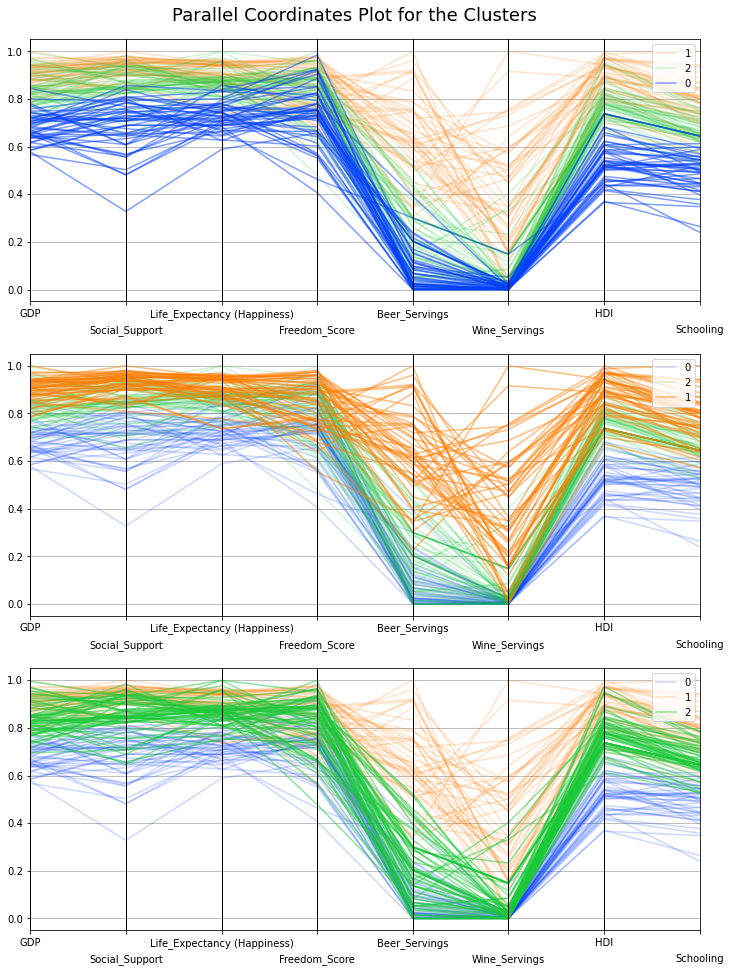

In [20]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(happy_clustered, 3)

In [21]:
#create a data frame containing our centroids
# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=happy_data.columns)
# centroids['cluster'] = centroids.index

# display_parallel_coordinates_centroids(centroids,10)